<h1>Project 1 on Machine Learning, deadline October 7 (midnight), 2024</h1>

<h2>Franke function</h2>

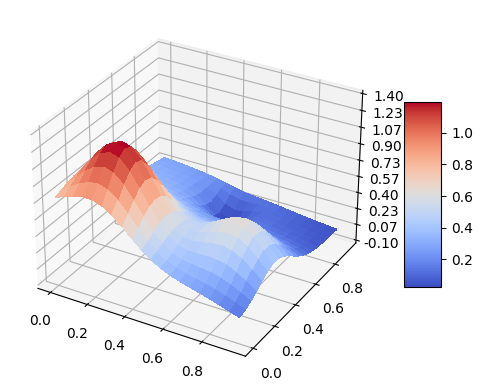

In [110]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<h2>Part a) : Ordinary Least Square (OLS) on the Franke function</h2>

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(0)

# Generate data.
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xm, ym = np.meshgrid(x,y)

def FrankeFunction(x, y, noisefactor=0.0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noisefactor*np.random.randn(x.shape[0], y.shape[1])

z = FrankeFunction(xm, ym)

x_flat = xm.flatten()
y_flat = ym.flatten()
z_flat = z.flatten()

#create a 5 degree poylnomial model for plotting
degree = 5
def create_design_matrix(x, y, degree):
    polydegs = sum(i for i in range(1, degree + 2)) # Number of combinations in polynomial
    beta_ticks = np.zeros(polydegs,dtype=object)

    X = np.ones((len(x), polydegs))
    column = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            # Create design matrix with columns 1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3, ...
            input = (x**i * y**j)
            X[:,column] = input

            # Create beta ticks only for plotting purposes
            if i== 0 and j == 0:
                string = r"$1$"
            elif i == 0 and j != 0:
                string = r"$y^{j}$".format(j=j)
            elif i != 0 and j == 0:
                string = r"$x^{i}$".format(i=i) 
            else:
                string = r"$x^{i}y^{j}$".format(i=i, j=j)
            beta_ticks[column] = string


            column += 1
    return X, beta_ticks

X,beta_ticks = create_design_matrix(x_flat, y_flat, degree)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=0)

#Calculate MSE and R2 for both scaled and unscaled data

#start with unscaled data | standardscaling(-= mean)
X_train_scaled = X_train.copy()
X_train_scaled[1:] = X_train[1:] - np.mean(X_train[1:], axis=0)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print('5 degree polynomial model')
print(f"MSE standardscaled: {mse:.4f}")
print(f"R2 standardscaled: {r2:.4f}")

#compare with minmaxscaling
X_train_scaled = X_train.copy()
X_train_max = np.max(X_train[1:])
X_train_min = np.min(X_train[1:])

X_train_scaled[1:] = (X_train[1:] - X_train_min) / (X_train_max - X_train_min)

# OLS regression
beta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE minmaxscaled: {mse:.4f}")
print(f"R2 minmaxscaled: {r2:.4f}")


# OLS regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

# MSE and R2 score
z_model = X @ beta
mse = mean_squared_error(z_flat, z_model)
r2 = r2_score(z_flat, z_model)
print(f"MSE unscaled: {mse:.4f}")
print(f"R2 unscaled: {r2:.4f}")




5 degree polynomial model
MSE standardscaled: 0.0022
R2 standardscaled: 0.9731
MSE minmaxscaled: 0.0021
R2 minmaxscaled: 0.9747
MSE unscaled: 0.0021
R2 unscaled: 0.9747


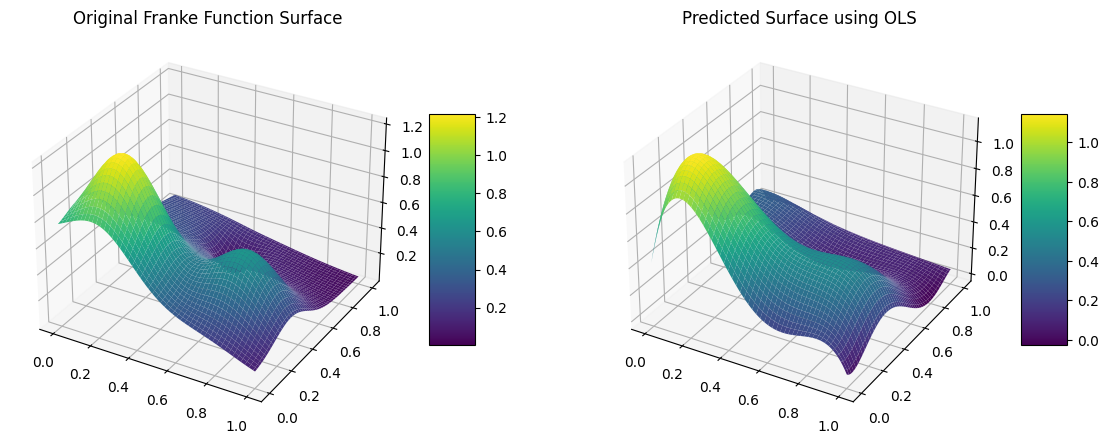

In [112]:
'''Since there was no significant difference between scaled and unscaled data, I will plot with unscaled data'''

fig = plt.figure(figsize=(14, 6))
# Original surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(xm, ym, z, cmap='viridis')
ax1.set_title("Original Franke Function Surface")
fig.colorbar(surf1, shrink=0.5, aspect=5)

# Predicted surface
z_model = z_model.reshape(n, n)

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xm, ym, z_model, cmap='viridis')
ax2.set_title("Predicted Surface using OLS")
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()


Best MSE: 0.0023 at degree: 5
Best R2: 0.9734 at degree: 5


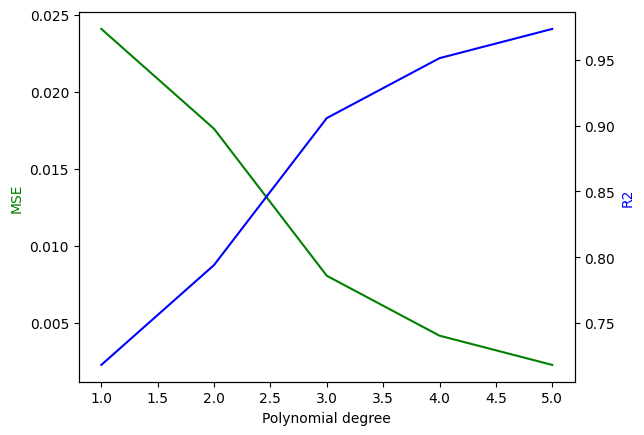

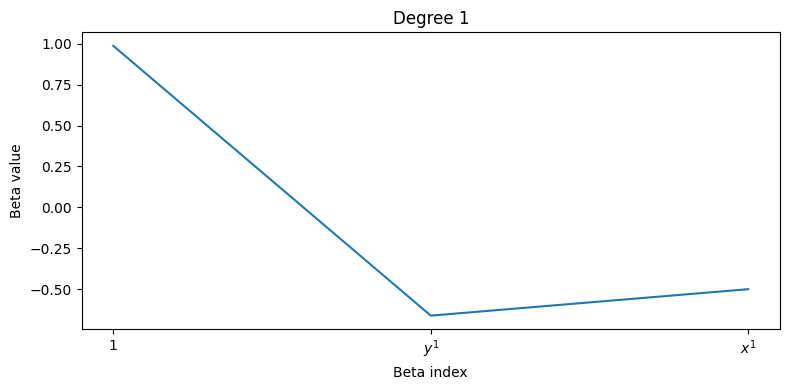

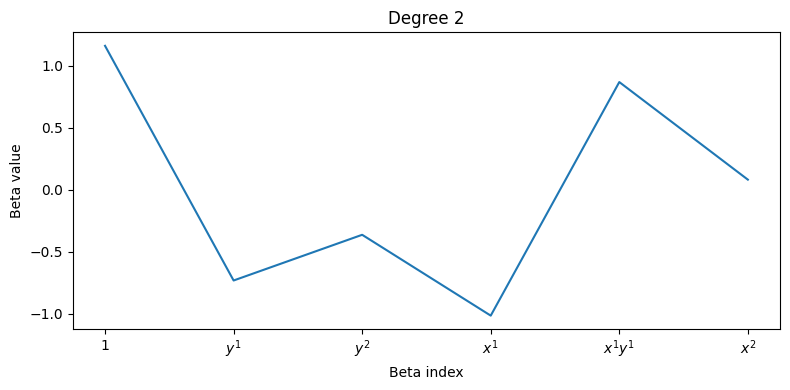

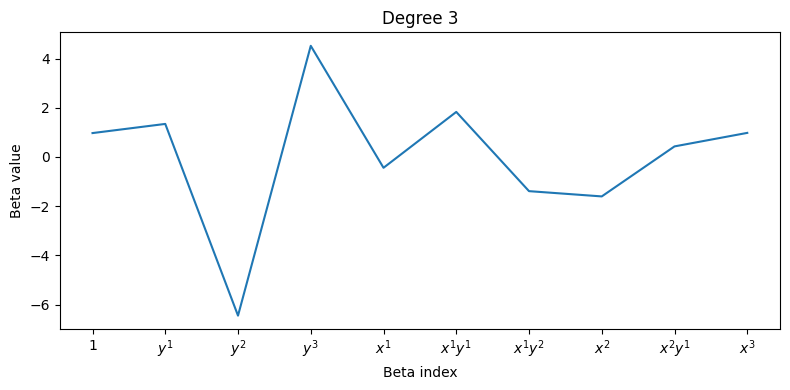

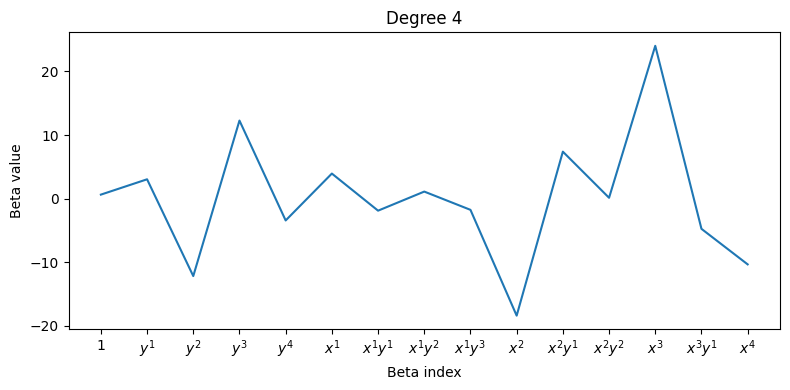

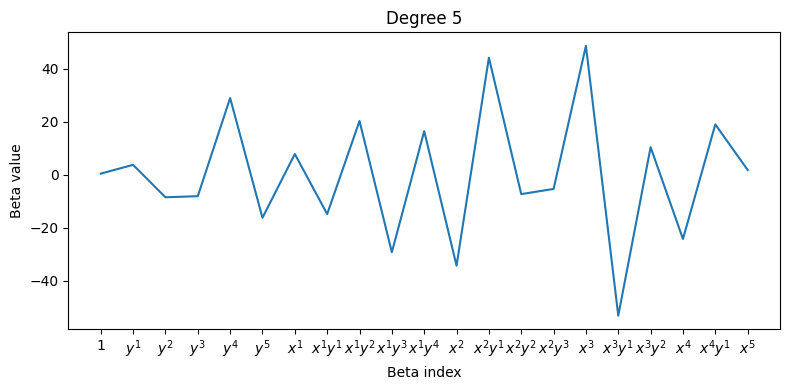

In [113]:
#Calculate and plot MSE and R2 score as a function of the polynomial degree, Also plot the beta values

degrees = np.arange(1, 6)
mse = []
r2 = []
beta_values = []
beta_ticks_list = []
BestVals = {}


for d in degrees:
    # Create design matrix for each degree
    X,beta_ticks = create_design_matrix(x_flat, y_flat, d)

    # Split the data
    X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

    # Scale
    X_train_scaled = X_train.copy()
    X_train_scaled[1:] = X_train[1:] - np.mean(X_train[1:], axis=0)


    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_pred = X_test @ beta

    mse.append(mean_squared_error(z_test, z_pred))

    r2.append(r2_score(z_test, z_pred))

    beta_values.append(beta)

    beta_ticks_list.append(beta_ticks)

#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at degree: {degrees[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at degree: {degrees[np.argmax(r2)]}")
BestVals['MSE OLS'] = np.min(mse)
BestVals['R2 OLS'] = np.max(r2)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(degrees, mse, 'g-')
ax2.plot(degrees, r2, 'b-')
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.show()



for i in range(d):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(beta_values[i])
    plt.title(f"Degree {i+1}")

    plt.xticks(ticks=np.arange(len(beta_ticks_list[i])), labels=beta_ticks_list[i])
    plt.xlabel('Beta index')
    plt.ylabel('Beta value')
    plt.tight_layout()
    plt.show()



Note for us:
Larger polynomial degrees -> larger beta values

<h2>Part b): Adding Ridge regression for the Franke function
</h2>

Best MSE: 0.0023 at lambda: 0.0001
Best R2: 0.9736 at lambda: 0.0001


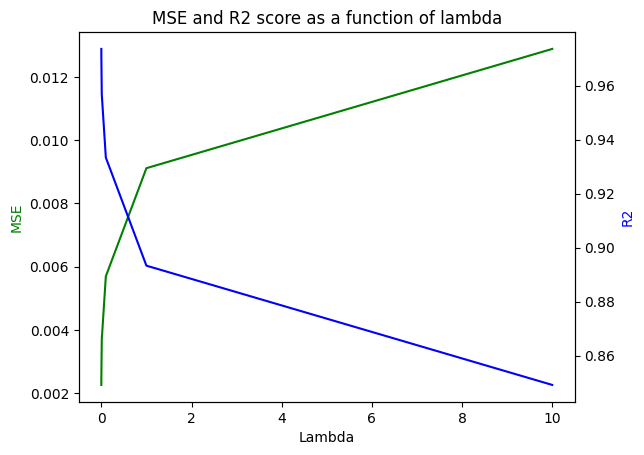

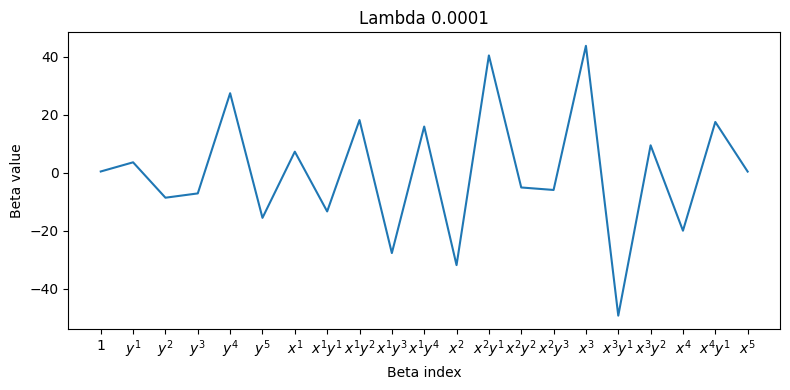

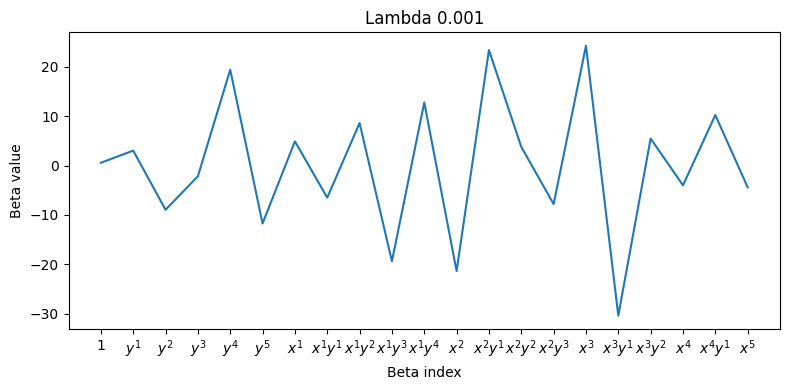

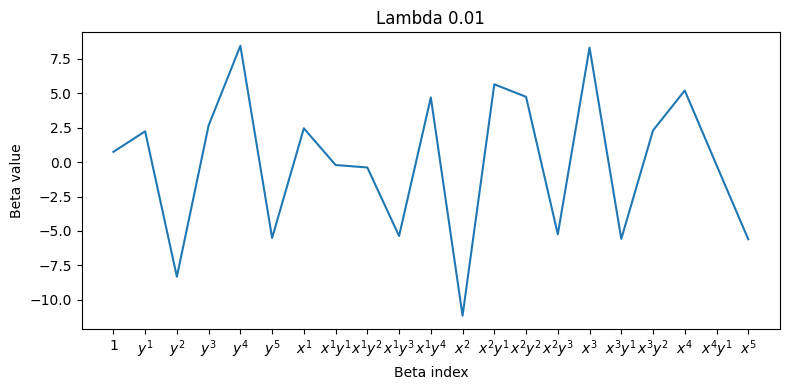

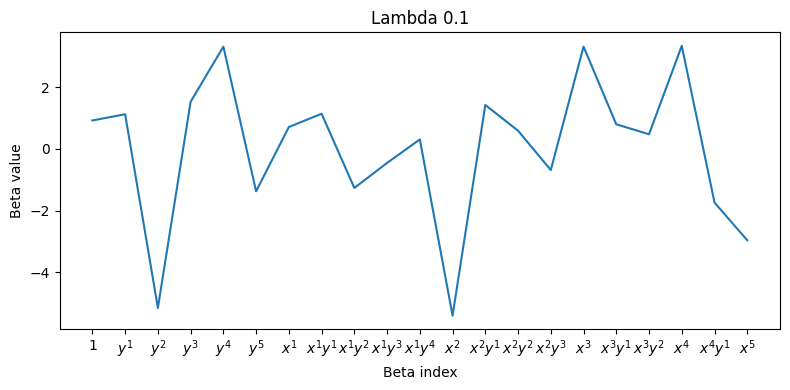

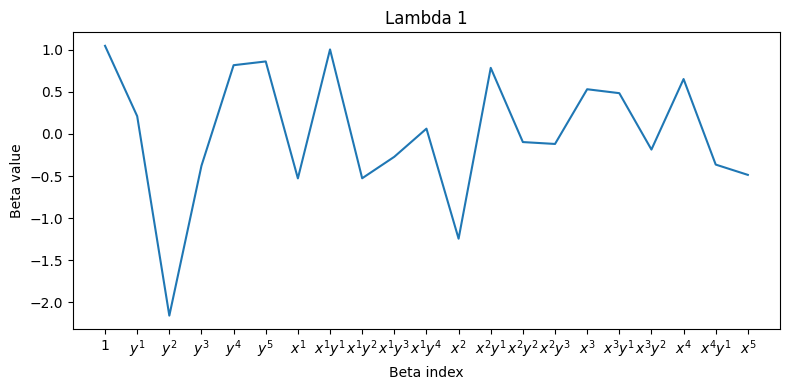

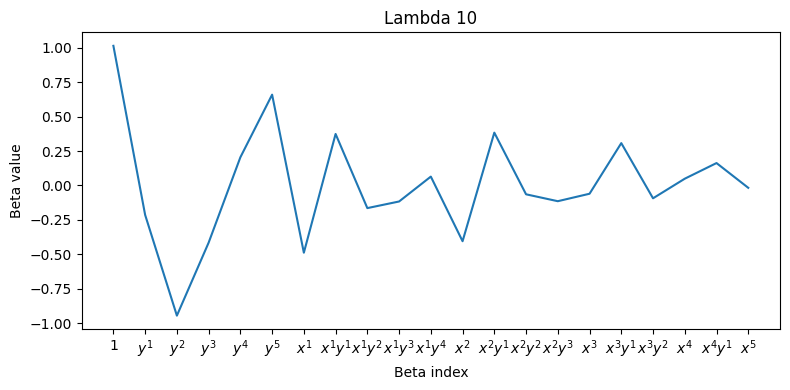

In [114]:
"""Whole process with Ridge regression on a 5 degree polynomial model with varying lambda values"""

#Ridge regression
Poly_deg = 5
X,beta_ticks = create_design_matrix(x_flat, y_flat, Poly_deg)

# Split the data
X_train, X_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2, random_state=42)

# Scale
X_train_scaled = X_train.copy()
X_train_scaled[1:] = X_train[1:] - np.mean(X_train[1:], axis=0)

lambda_values = [1e-4, 1e-3, 1e-2, 1e-1, 1,10]
mse = []
r2 = []
beta_values = []
beta_ticks_list = []

#create model for each lambda value
for l in lambda_values:
    beta = np.linalg.inv(X_train.T @ X_train + l*np.eye(X_train.shape[1])) @ X_train.T @ z_train
    z_pred = X_test @ beta

    mse.append(mean_squared_error(z_test, z_pred))
    r2.append(r2_score(z_test, z_pred))
    beta_values.append(beta)

    beta_ticks_list.append(beta_ticks)

#print best mse and r2
print(f"Best MSE: {np.min(mse):.4f} at lambda: {lambda_values[np.argmin(mse)]}")
print(f"Best R2: {np.max(r2):.4f} at lambda: {lambda_values[np.argmax(r2)]}")
BestVals['MSE Ridge'] = np.min(mse)
BestVals['R2 Ridge'] = np.max(r2)
BestVals['Lambda Ridge'] = lambda_values[np.argmax(r2)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse, 'g-')
ax2.plot(lambda_values, r2, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.title('MSE and R2 score as a function of lambda')
plt.show()

for i in range(len(lambda_values)):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(beta_values[i])
    plt.title(f"Lambda {lambda_values[i]}")

    plt.xticks(ticks=np.arange(len(beta_ticks_list[i])), labels=beta_ticks_list[i])
    plt.xlabel('Beta index')
    plt.ylabel('Beta value')
    plt.tight_layout()
    plt.show()

Note for us: Larger lambda values -> smaller beta values 

<h2>Part c) Adding Lasso for the Franke function</h2>

/Users/hishem/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.136e-02, tolerance: 6.527e-02
  model = cd_fast.enet_coordinate_descent(


Best MSE: 0.0041 at lambda: 1e-05
Best R2: 0.9523 at lambda: 1e-05


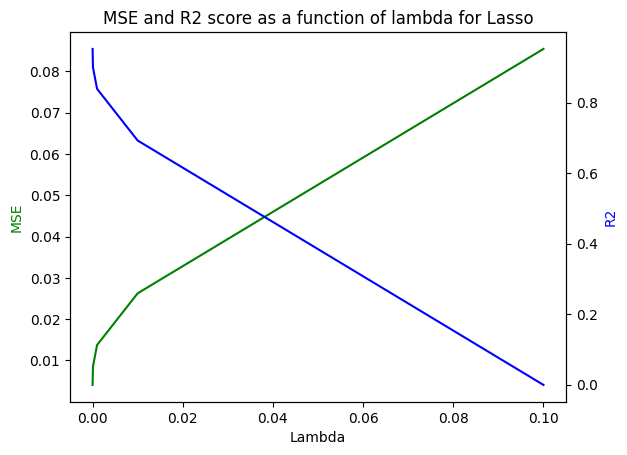

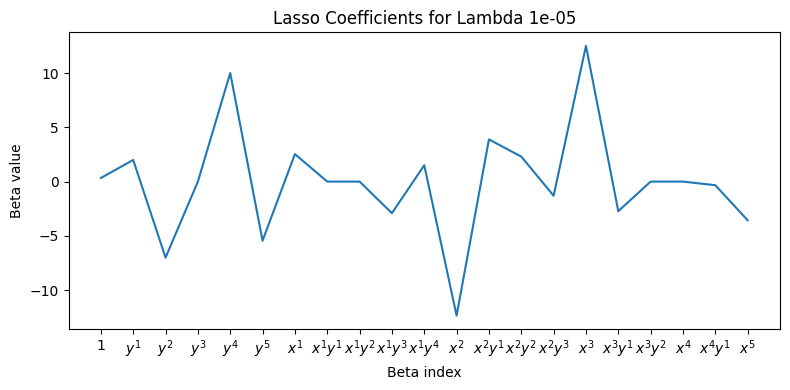

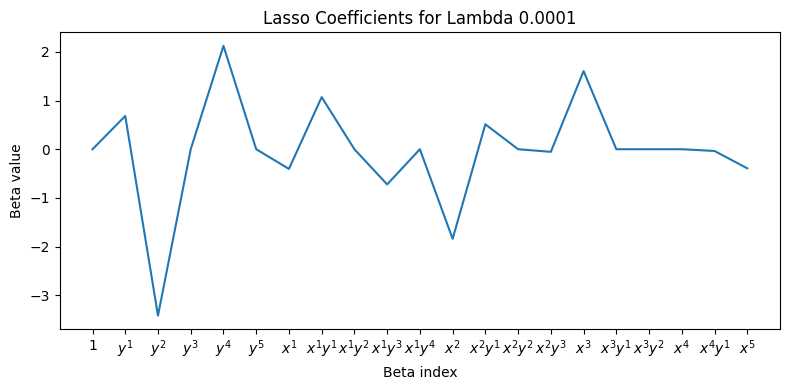

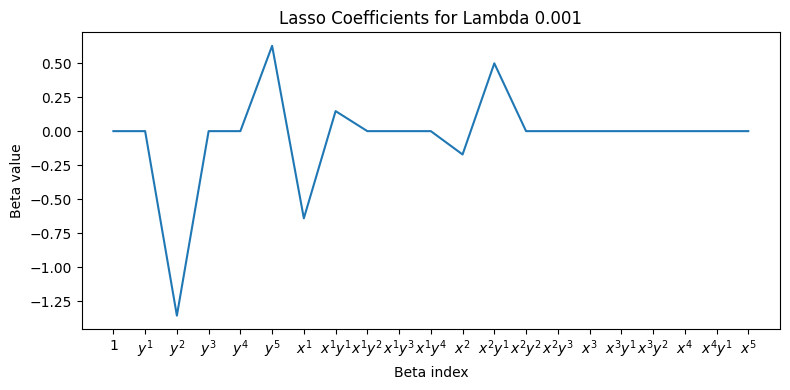

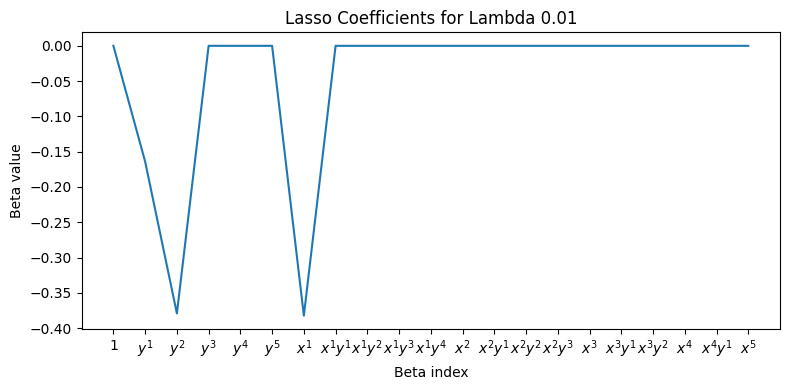

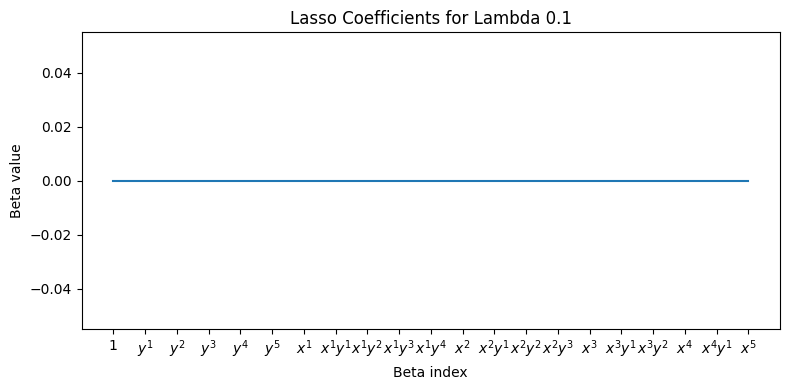

In [115]:
from sklearn.linear_model import Lasso

# Define the lambda values for Lasso regression
lambda_values = [1e-5,1e-4, 1e-3, 1e-2, 1e-1]
mse_lasso = []
r2_lasso = []
beta_values_lasso = []

X_test_scaled = X_test.copy()
X_test_scaled[1:] = X_test[1:] - np.mean(X_test[1:], axis=0)

# Create a Lasso model for each lambda value
for l in lambda_values:
    lasso = Lasso(alpha=l , max_iter=int(1e5), tol = 1e-4)
    lasso.fit(X_train_scaled, z_train)
    z_pred_lasso = lasso.predict(X_test_scaled)

    mse_lasso.append(mean_squared_error(z_test, z_pred_lasso))
    r2_lasso.append(r2_score(z_test, z_pred_lasso))
    beta_values_lasso.append(lasso.coef_)

# Print best MSE and R2 for Lasso
print(f"Best MSE: {np.min(mse_lasso):.4f} at lambda: {lambda_values[np.argmin(mse_lasso)]}")
print(f"Best R2: {np.max(r2_lasso):.4f} at lambda: {lambda_values[np.argmax(r2_lasso)]}")
BestVals['MSE Lasso'] = np.min(mse_lasso)
BestVals['R2 Lasso'] = np.max(r2_lasso)
BestVals['Lambda Lasso'] = lambda_values[np.argmax(r2_lasso)]


# Plot MSE and R2 score as a function of lambda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_values, mse_lasso, 'g-')
ax2.plot(lambda_values, r2_lasso, 'b-')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R2', color='b')
plt.title('MSE and R2 score as a function of lambda for Lasso')
plt.show()

for i in range(len(lambda_values)):
    fig = plt.figure(figsize=(8, 4))
    plt.plot(beta_values_lasso[i])
    plt.title(f"Lasso Coefficients for Lambda {lambda_values[i]}")

    plt.xticks(ticks=np.arange(len(beta_ticks)), labels=beta_ticks)
    plt.xlabel('Beta index')
    plt.ylabel('Beta value')
    plt.tight_layout()
    plt.show()

In [124]:
#print best mse and r2 as columns in a dataframe
for i in BestVals:
    print(i, f'{BestVals[i]:.5f}')


MSE OLS 0.00227
R2 OLS 0.97342
MSE Ridge 0.00226
R2 Ridge 0.97357
Lambda Ridge 0.00010
MSE Lasso 0.00407
R2 Lasso 0.95230
Lambda Lasso 0.00001


I found the best model to be the Ridge regression with $λ = 0.0001$

<h2>Part d): Paper and pencil part</h2>



There exists a continuous function $f(\mathbf{x})$ and a normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$ which describes our data $\mathbf{y} = f(\mathbf{x}) + \epsilon$. We approximate the function $f$ with our model $\mathbf{\tilde{y}}= \mathbf{X\beta}$, minimized by $(\mathbf{y} - \mathbf{\tilde{y}})^2$.

Show that the expectation value of $\mathbf{y}$ for a given element in $i$:
$$\mathbb{E}(y_i) = \sum_j x_{ij}\beta_j=\mathbf{X}_{i,*}\mathbf{\beta}$$ 
and its variance is:
$$\text{Var}(y_i) = \sigma^2$$


Given $\mathbf{y} = f(\mathbf{x}) + \epsilon$ and $ \epsilon \sim N(0, \sigma^2) $

Expectation value:
$$\mathbb{E} (\mathbf{y}) = \mathbb{E}(f(\mathbf{x}) + ϵ ) = \mathbb{E}(f(\mathbf{x})) $$
Since $\mathbb{E}(\epsilon) = 0$, because we assume $\epsilon$ to be normally distributed with a mean value of 0, and a variance of $\sigma^2$.

We need to keep in mind our model for $\mathbf{y}$ is $\mathbf{\tilde{y}}= \mathbf{X\beta}$

From there we can look at it element-wise:
$$\mathbb{E}(y_i) =  \sum_j x_{ij} β_j  = \mathbf{X}_{i,*}\mathbf{\beta}$$


Variance:
The variance lies in the normal distributed error $\mathbf{\epsilon} \sim N(0,\sigma^2)$. 
For each point in $\mathbf{y}$ the variance   $\text{Var}(y_i) =\sigma^2$. 
And therefor $y_i ∼ N(\mathbf{X}_{i,*}\mathbf{\beta},\sigma^2)$ 
with the mean value $\mathbf{X}_{i,*}\mathbf{\beta}$ and variance $\sigma^2$




Show that $\mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta}$ using the (OLS) expression for the optimal parameters $\mathbf{\hat{\beta}}$, 
$$\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

Then we need the expression for $\mathbf{y}$, $\mathbf{y} = \mathbf{X\beta} + \mathbf{\epsilon}$ and we can substitute into the OLS expression:
$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Then we can find the expectation value:
$$\mathbb{E}(\mathbf{\hat{\beta}})   = \mathbb{E}(\mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon})$$
$$ = \mathbb{E} ( \mathbf{\beta}) + \mathbb{E} ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}) = \mathbf{\beta}$$
This is because  $\mathbb{E} ( \mathbf{\beta}) = \mathbf{\beta}$ and $ \mathbb{E} ( \epsilon) = 0$

Thus, we have shown that: $ \mathbb{E}(\mathbf{\hat{\beta}}) = \mathbf{\beta} $





To show that $\text{Var}(\mathbf{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$, we can start the same way as before:

$$ \mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X\beta} + \mathbf{\epsilon}) $$
$$ = (\mathbf{X}^T \mathbf{X})^{-1} (\mathbf{X}^T\mathbf{X}β + \mathbf{X}^T\mathbf{\epsilon} )$$
$$ = \mathbf{\beta} +  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{\epsilon}$$

Since $\mathbf{\beta}$ is a constant vector, its variance is zero: $ \text{Var}(\mathbf{\beta}) = 0 $

Variance of linear transformation: $\text{Var}(\mathbf{A\epsilon}) = \mathbf{A}\text{Var}(\mathbf{\epsilon})\mathbf{A^T}$.

Set $\mathbf{A} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$:
$$\text{Var}(\mathbf{A\epsilon}) = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \text{Var}(\epsilon) ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T$$
$\text{Var}(\epsilon) = \sigma^2$.
$$= (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T  ((\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T)^T \sigma^2$$
$$=  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}   \sigma^2$$
$$ = (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2$$